### Imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import pandas as pd
from mpl_toolkits import mplot3d
from IPython.display import Video
import os
from astropy.io import fits

### Constants

In [4]:
G = 6.67e-11  # m^3 kg^-1 s^-2
mEarth = 6.0e24
radiusEarth = 6.4e6
Msun = 1.989e30  # kg

### Functions ###


In [6]:
# # Recreated the missing function directly
# def forceMagnitude(m1, m2, r):
#     '''
#     Purpose
#     -------
#     the purpose of this function is to calculate the gravitational force 
#     between two masses using Newton’s law of gravitation.

#     How it works
#     ------------
#     This function uses the gravitational constant and the equation 
#     F = G * m1 * m2 / r^2 to get the force between the two objects. 

#     Atributes
#     ---------
#     m1 = the mass of the first object in kilograms
#     m2 = the mass of the second object in kilograms
#     r = the distance between the two objects (in meters)

#     return
#     ------
#     the force between the two objects in Newtons (float)
#     '''
#     return G * m1 * m2 / r**2

In [7]:
def magnitude(a): #calculate magnitude
    '''
    This function returns the magnitude of a vector.
    
    Parameters
    ---------
    a : numpy array
        An array representing a physical vector.
        It can have any number of elements,
        but 2 or 3 elements will be most common:
            in 2D, a = np.array([x, y])
            in 3D, a = np.array([x, y, z])

    Returns
    -------
    |a| : float
        The magnitude (length) of the array.
    '''
    
    # calculate sqrt(x**2 + y**2 + ...)
    return np.sqrt(np.sum(a**2))

In [8]:
def unit(a): #Unit vector function
    '''
    This function returns a vector's unit vector
    (the vector that is parallel to it but has length of 1)
    
    Parameters
    ---------
    a : numpy array
        An array representing a physical vector.
        It can have any number of elements,
        but 2 or 3 elements will be most common:
            in 2D, a = np.array([x, y])
            in 3D, a = np.array([x, y, z])

    Returns
    -------
    a_hat : float
        The unit vector parallel to the vector
    '''

    # divide the vector by its length
    return a/magnitude(a)

In [9]:
def separation(p_i, p_j): #seperation vector
    '''
    This function returns the separation between two vectors.
    
    Parameters
    ---------
    p_i : numpy array
        An array representing a physical vector.
    
    p_j : numpy array
        An array representing a second physical vector.

    Returns
    -------
    r_ij : numpy array
        The separation vector, p_j - p_i.
    '''
    
    # numpy makes vector math easy!
    return p_j - p_i

In [10]:
def forceMagnitude(m_i, m_j, r): #this is a code that accepts two masses
    '''
    This function returns the magnitude of the 
    gravitational force, given two masses
    and a separation.
    
    Parameters
    ---------
    m_i : float
        A mass, in kg.
    
    m_j : float
        A mass, in kg.
        
    r : float
        The distance between the two masses, in m.

    Returns
    -------
    F_g : float
        The magnitude of the force of gravity between them, in N.
    '''
    
    # calculate the magnitude of the gravitational force
    return G * m_i * m_j / r**2

In [11]:
def forceVector(m_i, m_j, p_i, p_j): #this is a function that accepts two masses and two vectors
    '''
    This function returns the full gravitational force vector
    for the force acting on particle i, caused by particle j.
    


    Parameters
    ---------
    m_i : float
        A mass representing particle i, in kg.
    
    m_j : float
        A mass representing particle j, in kg.
        
    p_i : numpy array
        A vector representing the position of particle i.
    
    p_j : numpy array
        A vector representing the position of particle j.


    Returns
    -------
    F_g : numpy array
        The force vector acting on particle i, in N.
    '''
    
    # calculate the separation vector, and its magnitude
    r_vector = separation(p_i, p_j)
    r_magnitude = magnitude(r_vector)

    # calculate the magnitude of the force
    F_magnitude = force_magnitude(m_i, m_j, r_magnitude)

    # calculate the direction of the force, as a unit vector
    F_unit = unit(r_vector)
    
    # return the full force vector
    return F_magnitude * F_unit

In [12]:
def unitDirectionVector(r1, r2):
    '''
    Purpose
    -------
    the purpose of this function is to calculate the gravitational force 
    between two masses using Newton’s law of gravitation.

    How it works
    ------------
    This function uses the gravitational constant and the equation 
    F = G * m1 * m2 / r^2 to get the force between the two objects. 

    Atributes
    ---------
    m1 = the mass of the first object in kilograms
    m2 = the mass of the second object in kilograms
    r = the distance between the two objects (in meters)

    return
    ------
    the force between the two objects in Newtons (float)
    '''
    diff = r2 - r1
    return diff / np.linalg.norm(diff)

In [13]:
def forceVector(m1, m2, r1, r2):
    '''
    Purpose
    -------
    the purpose of this function is to get the gravitational force 
    vector that one object feels from another object. 

    How it works
    ------------
    This will calculate the magnitude of the force using the 
    forceMagnitude function and then multiply it by the unit direction 
    vector between the two objects. This way, it returns a force vector 
    not just a number.

    Atributes
    ---------
    m1 = the mass of the first object in kilograms
    m2 = the mass of the second object in kilograms
    pos1 = a numpy array of the first object’s position
    pos2 = a numpy array of the second object’s position

    return
    ------
    a numpy array that represents the force vector on object 2 from object 1
    '''
    direction = unitDirectionVector(r1, r2)
    distance = np.linalg.norm(r2 - r1)
    magnitude = forceMagnitude(m1, m2, distance)
    return direction * magnitude

In [14]:
def updateParticles(masses, positions, velocities, dt):
    '''updateParticles(masses, positions, velocities, dt)
    Evolve particles in time via leap-frog integrator scheme. This function
    takes masses, positions, velocities, and a time step dt as
    
    Parameters
    ----------
    masses : np.ndarray
        1-D array containing masses for all particles, in kg
        It has length N, where N is the number of particles.
    positions : np.ndarray
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    velocities : np.ndarray
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    dt : float
        Evolve system for time dt (in seconds).
    
    Returns
    -------
    Updated particle positions and particle velocities, each being a 2-D
    array with shape (N, 3), where N is the number of particles.
    '''

    N = len(masses)

    # Step 1: Compute current accelerations
    accelerations = np.zeros_like(positions)
    for i in range(N):
        for j in range(N):
            if i != j:
                accelerations[i] += forceVector(masses[i], masses[j], positions[i], positions[j]) / masses[i]

    # Step 2: Update positions
    new_positions = positions + velocities * dt + 0.5 * accelerations * dt**2

    # Step 3: Compute new accelerations at new positions
    new_accelerations = np.zeros_like(positions)
    for i in range(N):
        for j in range(N):
            if i != j:
                new_accelerations[i] += forceVector(masses[i], masses[j], new_positions[i], new_positions[j]) / masses[i]

    # Step 4: Update velocities
    new_velocities = velocities + 0.5 * (accelerations + new_accelerations) * dt

    return new_positions, new_velocities


In [15]:
def calculateTrajectories(masses, positions_0 , velocities_0, dt, t_max = 0):
    '''
    Purpose
    -------
    the prpose of this funtion is to change the the particles initial 
    positions and inital velocites over some time. 
    
    How it works
    ------------
    This will use a loop so that it is updating the the position and velocities at at each point in time.
    Each time that it updates these positions and velocities it should be storing it in an array.
    
    Atributes
    ---------
    mass = 1D array of the N particle elements 
    Position_0 = the intial position of the particles(2D array)
    Velocities_0 = this is the initial velocites of each particle (2D array)
    dt = this is the step size (in seconds)
    t = the total time need to evolve the system (in seconds) aka this is the max time 
    
    return
    ------
    times = this should be in a 1D array of each time step (this includes t_0)
    positions = this should be a multi-dimensional array of all the positions at some time
    velocities= This thould also print multi-dimensional array of all the velocities at some time
    
    '''
    Pos = []
    Vel =[]
    #this will just be where all of the positions and velocities will go
     #this will be the array for time
 #I definded this so that it will start at 0 and add the step size each time
    time = np.arange(0, t_max + dt, dt)

   #print(masses)
    #print(positions_0)
    #print(velocities_0)
    #I am trying to add all of the times into an array up to what t_max at the step size of dt
    for j in range(len(time)):
             #I am trying to make it so that it takes the velocity and position at each time and adds it to a new array
        P, V = updateParticles(masses, positions_0, velocities_0, dt)
        Pos.append(P)
        Vel.append(V)
        positions_0 = P
        velocities_0 = V
        #print(P)
        #I want this to print time, position, and velocity in differet colums so that it is easier to extract the data
    return np.array([Pos]), np.array([Vel]), np.array([time])  

#### Using the help to pull from a function description

In [17]:
help(forceVector)

Help on function forceVector in module __main__:

forceVector(m1, m2, r1, r2)
    Purpose
    -------
    the purpose of this function is to get the gravitational force
    vector that one object feels from another object.

    How it works
    ------------
    This will calculate the magnitude of the force using the
    forceMagnitude function and then multiply it by the unit direction
    vector between the two objects. This way, it returns a force vector
    not just a number.

    Atributes
    ---------
    m1 = the mass of the first object in kilograms
    m2 = the mass of the second object in kilograms
    pos1 = a numpy array of the first object’s position
    pos2 = a numpy array of the second object’s position

    return
    ------
    a numpy array that represents the force vector on object 2 from object 1



### Example Use

In [19]:
mPerson = 70.0
print(forceMagnitude(mEarth, mPerson, radiusEarth))
# Should output ≈ 683.94 N

683.935546875


In [20]:
someplace = np.array([3.0,2.0,5.0])
someplaceelse = np.array([1.0,-4.0,8.0])
print(unitDirectionVector(someplace, someplaceelse))
# [-0.28571429 -0.85714286  0.42857143]

[-0.28571429 -0.85714286  0.42857143]


In [21]:
mPerson = 1
centerEarth = np.array([0, 0, 0])
surfaceEarth = np.array([0, 0, 1]) * radiusEarth
print(forceVector(mEarth, mPerson, centerEarth, surfaceEarth))
# Should print ≈ [0. 0. 9.77]

[0.         0.         9.77050781]


In [22]:
mass = np.array([1.0])
positions = np.array([[1.0, 1.0, 1.0]])
velocities = np.array([[1.0, 1.0, 1.0]])
dt = 1.0

print(updateParticles(mass, positions, velocities, dt))
# Should return (array([[2., 2., 2.]]), array([[1., 1., 1.]]))

(array([[2., 2., 2.]]), array([[1., 1., 1.]]))


### Some wotk on creating Arrays

In [24]:
au = 1.49e11 #This will help convert from au to meters
MassS =  np.array([1.989e30, 5.972e24]) 
PosS = np.array([[-3e-6, +0.0000e+00, +0.0000e+00],[0.999997, +0.0000e+00,+0.0e+00]]) * au
VelS = np.array([[+0.0000e+00,-8.94e-2, +0.0000e+00],[+0.0000e+00, 2.98e4, +0.0000e+00]])
time = 1000 * 24 * 60 * 60 #I am convertining it to seconds
stept = 0.1 * 24 * 60 * 60 #I am converting it to seconds

Pos, Vel, Time = calculateTrajectories(MassS, PosS , VelS, stept, time )

#### Checking some results

In [26]:
print(Pos.ndim) # Number of dimentions
print(Pos.shape) # The shape of the array
print(Time.shape)
Pos_all = np.squeeze(Pos) / au #AU
print(Pos_all.shape) # to find the shape of an array
Time_SE = np.squeeze(Time)/24/60/60 #np.squeeze = removal of single-dimensional elements from the shape of a NumPy array
print(Time_SE.shape) 

4
(1, 10001, 2, 3)
(1, 10001)
(10001, 2, 3)
(10001,)


#### Plotting 

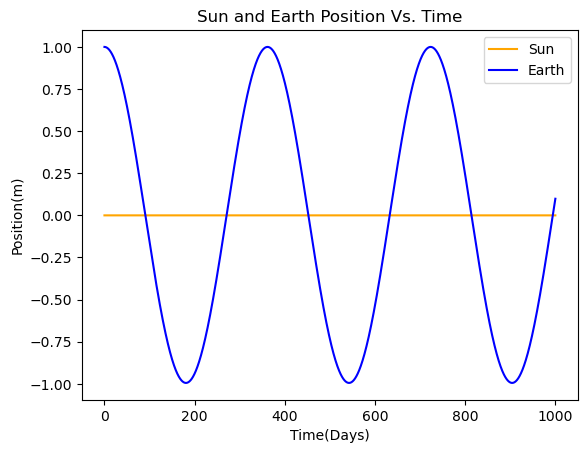

In [28]:
plt.plot(Time_SE, Pos_all[:,0,0],color = 'orange', label = 'Sun') #This is using the first mass, 1st row, and the x value of the position
plt.plot(Time_SE, Pos_all[:,1,0], color = 'blue',label = 'Earth')#I follow a similar thing to the line above
plt.legend() #This is just so I know which color is which 
plt.title('Sun and Earth Position Vs. Time')
plt.ylabel('Position(m)')
plt.xlabel('Time(Days)');

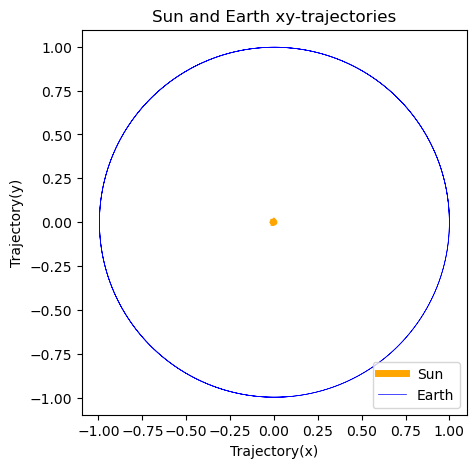

In [29]:
plt.figure(figsize=(5,5))#This helps to make the image larger.
plt.plot(Pos_all[:,0,0], Pos_all[:,0,1],color = 'orange', label='Sun',linewidth=5)
plt.plot(Pos_all[:,1,0], Pos_all[:,1,1], color='blue',label='Earth',linewidth=0.5)
plt.legend()
plt.title('Sun and Earth xy-trajectories')
plt.ylabel('Trajectory(y)')
plt.xlabel('Trajectory(x)')
plt.axis('scaled');

(10001, 2, 3)


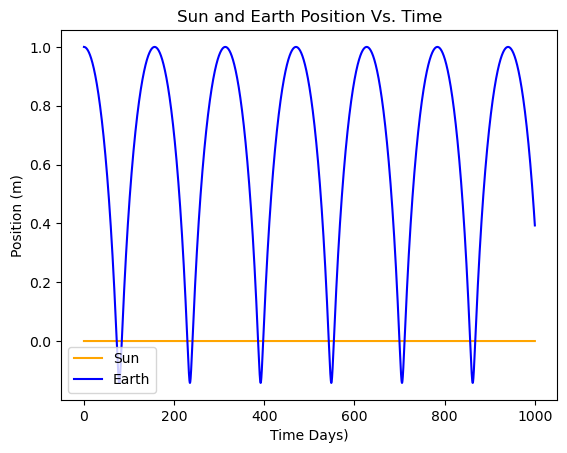

In [30]:
VelTwo = np.array([[+0.0000e+00,-8.94e-2, +0.0000e+00],[+0.0000e+00, 2.98e4, +0.0000e+00]])/2#This is decresinf it by a factor of two
Pos2, Vel2, Time2 =calculateTrajectories(MassS, PosS , VelTwo, stept, time )

Pos_SE2 = np.squeeze(Pos2)/au #I divid by au so that these plot for position will be back in units of au
print(Pos_SE2.shape)
Time_SE2 = np.squeeze(Time2)/24/60/60
Vel_SE2 = np.squeeze(Vel2)

plt.plot(Time_SE2, Pos_SE2[:,0,0],color = 'orange', label='Sun')
plt.plot(Time_SE2, Pos_SE2[:,1,0], color='blue',label='Earth')
plt.legend()
plt.title('Sun and Earth Position Vs. Time') #(Velocity decreased by a factor of 2)
plt.ylabel('Position (m)')
plt.xlabel('Time Days)');

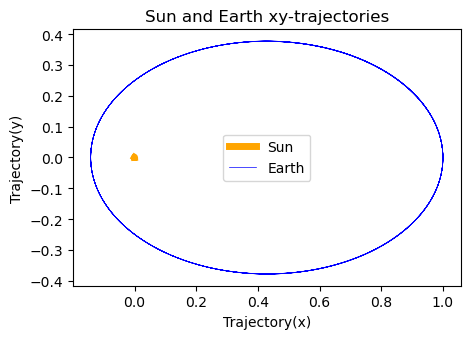

In [31]:
plt.figure(figsize=(5,10))
Pos_all
plt.plot(Pos_SE2[:,0,0], Pos_SE2[:,0,1],color = 'orange', label='Sun',linewidth=5)
plt.plot(Pos_SE2[:,1,0], Pos_SE2[:,1,1], color='blue',label='Earth',linewidth=0.5)
plt.legend()
plt.title('Sun and Earth xy-trajectories') # (Velocity decreased by a factor of 2)
plt.ylabel('Trajectory(y)')
plt.xlabel('Trajectory(x)')
plt.axis('scaled');

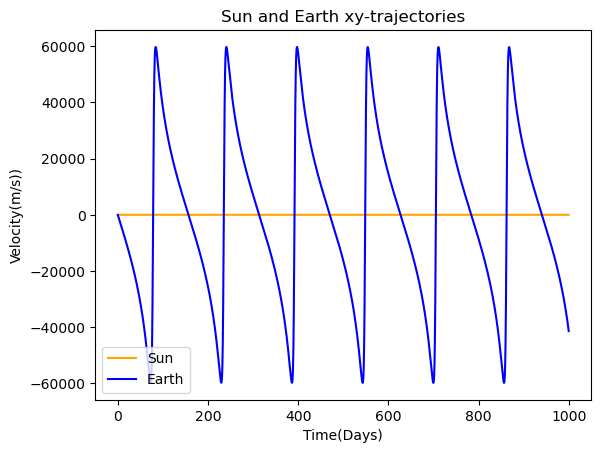

In [32]:
plt.plot(Time_SE2 ,Vel_SE2[:,0,0],color = 'orange', label='Sun') #This is the just to plot the graph 
plt.plot(Time_SE2 ,Vel_SE2[:,1,0], color='blue',label='Earth')#this is just the y of the points.
plt.legend()
plt.title('Sun and Earth xy-trajectories') #(Velocity decreased by a factor of 2)
plt.ylabel('Velocity(m/s))')
plt.xlabel('Time(Days)');

### The circumbinary Exoplanet Kepler-16 ABb:

In [34]:
### Manually inputting 
MassKep=np.array([+1.3718e+30,+4.0287e+29, +6.3250e+26])
KepP=np.array([[+7.6349e+09,-9.6587e+05, +1.8447e+09],[-2.5998e+10,+3.2889e+06,-6.2813e+09],[+3.7761e+10,-4.0923e+07,+8.1934e+10]])
KepV=np.array([[-1.0502e+03,-6.8224e+00,+1.3030e+04],[+3.5760e+03,+2.3231e+01,-4.4368e+04],[-3.6298e+04,-1.0812e+01,+1.7020e+04]])


In [35]:
###I commented it out beceause I no longer have the file but I will show examples using other files that I still do have and see if it works.

#loads the file into this notebook
#files ='/home/vees3978/Final_Project_2600/' #I should make sure to pay attention to what folder I downloaded it to

#this takes the files from each file
#kepler16 = pd.read_csv('kepler16.txt',sep=' ', skiprows=1, names=["mass (kg)", "x(m)","y(m)","z (m)","vx (m/s)", "vy (m/s)","vz (m/s)"])

#Mass3= kepler16["mass (kg)"].values 
#x= kepler16["x(m)"].values
#y=kepler16["y(m)"].values
#z=kepler16["z (m)"].values
#vx=kepler16["vx (m/s)"].values
#vy=kepler16["vy (m/s)"].values
#vz=kepler16["vz (m/s)"].values

#KepPos,KepVel,KepTime=calculateTrajectories(MassKep,KepP, KepV , KepDt, TimeK)

#TimeKep = np.squeeze(KepTime)
#VelKep = np.squeeze(KepVel)
#PosKep = np.squeeze(KepPos)

#print(KepP[0,0])

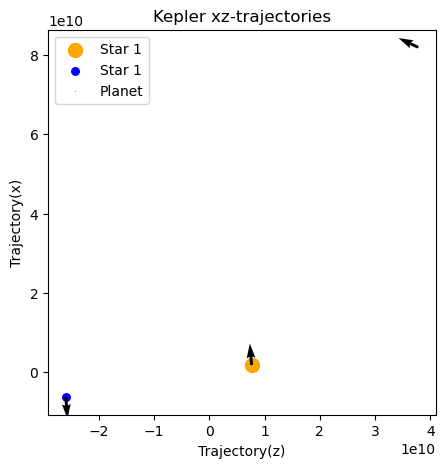

In [36]:
KepPor=[]

for i in range(len(MassKep)):
    KepPor.append(MassKep[i]/np.max(MassKep)*100)

plt.figure(figsize=(5,5))#This helps to make the image larger.
plt.scatter(KepP[0,0], KepP[0,2],color = 'orange', label='Star 1', s=KepPor[0])#this is the first object
plt.scatter(KepP[1,0], KepP[1,2], color='Blue',label='Star 1',s=KepPor[1])#this is the second object
plt.scatter(KepP[2,0], KepP[2,2],color='Red',label='Planet',linewidth=0.5,s=KepPor[2])#this is the third object
plt.title('Kepler xz-trajectories')#I just wanted to tittle it so that it is clear
plt.legend()#This so I know what each color means
plt.ylabel('Trajectory(x)')#This is just the label
plt.xlabel('Trajectory(z)')
plt.quiver(KepP[0,0], KepP[0,2], KepV[0,0], KepV[0,2])#I had to do each vector for each point in different rows so that it would work well  
plt.quiver(KepP[1,0], KepP[1,2], KepV[1,0], KepV[1,2])
plt.quiver(KepP[2,0], KepP[2,2], KepV[2,0], KepV[2,2]);
#The planet is really small but I hope that the legend helps to know its there with the velocity vector.

In [37]:
#I am convertining it to seconds
KepDt= 0.5*24*60*60
TimeK = 500*24*60*60

KepPos,KepVel,KepTime = calculateTrajectories(MassKep,KepP, KepV , KepDt, TimeK)

TimeKep = np.squeeze(KepTime)/24/60/60
VelKep = np.squeeze(KepVel)
PosKep = np.squeeze(KepPos)/au #I'm just trying to fix my units.

In [38]:
# Number of planetesimals
N = 30

# Generate random masses (e.g., between 1e20 and 1e23 kg)
masses = np.random.uniform(1e20, 1e23, N)

# Generate positions in a disk (random radius and angle)
radii = np.random.uniform(0.1 * au, 1.0 * au, N)
angles = np.random.uniform(0, 2 * np.pi, N)
x = radii * np.cos(angles)
y = radii * np.sin(angles)
z = np.random.uniform(-0.01 * au, 0.01 * au, N)  # thin disk

# Compute circular orbital velocities around the Sun
# Assuming all are orbiting the sun at origin (0,0,0)
v_circular = np.sqrt(G * Msun / radii)

# Velocity vectors are perpendicular to position vector in the xy-plane
vx = -v_circular * np.sin(angles)
vy = v_circular * np.cos(angles)
vz = np.random.uniform(-10, 10, N)  # small vertical motion

# Create DataFrame
df = pd.DataFrame({
    "mass (kg)": masses,
    "x(m)": x,
    "y(m)": y,
    "z (m)": z,
    "vx (m/s)": vx,
    "vy (m/s)": vy,
    "vz (m/s)": vz
})

# Save to file
df.to_csv("planetesimalDisk.txt", sep=' ', index=False)

print("✅ File 'planetesimalDisk.txt' created with", N, "planetesimals.")

✅ File 'planetesimalDisk.txt' created with 30 planetesimals.


In [52]:
#loads the file into this notebook
files ='/Users/vees3978/Curry/Shannon_Python_Help/' #I should make sure to pay attention to what folder I downloaded it to

#this takes the data from line in the file
pltDisk = pd.read_csv('planetesimalDisk.txt',sep=' ', skiprows=1, names=["mass (kg)", "x(m)","y(m)","z (m)","vx (m/s)", "vy (m/s)","vz (m/s)"])

pltMass= pltDisk["mass (kg)"].values 
pltx= pltDisk["x(m)"].values
plty=pltDisk["y(m)"].values
pltz=pltDisk["z (m)"].values
pltvx=pltDisk["vx (m/s)"].values
pltvy=pltDisk["vy (m/s)"].values
pltvz=pltDisk["vz (m/s)"].values



In [54]:
totpltpos = np.column_stack((pltx, plty, pltz))
totpltvel = np.column_stack((pltvx, pltvy, pltvz))
    
pltdt=0.5*24*60*60
pltT=20*24*60*60  

PDP, PDV, PDT = calculateTrajectories(pltMass, totpltpos, totpltvel, pltdt, pltT)

In [55]:
TimepltD = np.squeeze(PDT)/24/60/60
VelpltD = np.squeeze(PDV)
PosPltD = np.squeeze(PDP)/au

PDPx = PosPltD[:,:,0]
PDPy = PosPltD[:,:,1]
PDPz = PosPltD[:,:,2]

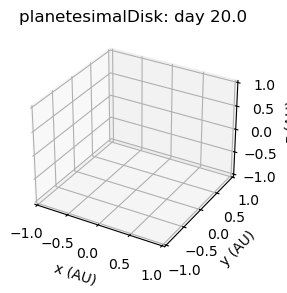

In [56]:
fig = plt.figure(figsize=(4, 3))
ax = plt.axes(projection='3d')

scat = ax.scatter([], [], [], s=2)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
ax.set_zlabel('z (AU)')

def init():
    scat._offsets3d = ([], [], [])
    return scat,

def update(frame):
    scat._offsets3d = (PDPx[frame, :], PDPy[frame, :], PDPz[frame, :])
    ax.set_title(f'planetesimalDisk: day {TimepltD[frame]}')
    return scat,

ani = animation.FuncAnimation(fig, update, frames=range(0, len(TimepltD), 5),
                              init_func=init, blit=False)

HTML(ani.to_jshtml())
